<a href="https://colab.research.google.com/github/sebasmos/satellite.extractor/blob/main/downloader_sentinel_5_cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/satellite_project

/content/drive/MyDrive/satellite_project


# Setup

In [ ]:
!pip install sentinelhub
! pip install sentinelhub --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.4/244.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.5 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=afda0894e1df3daaa80dcfa8a197ee27441451f6d3238c42defa11e305e9a3fb
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
#% cd /content/drive/MyDrive/Dengue_prediction/Codes_download_data_sentinel/

#!git clone https://github.com/sentinel-hub/sentinelhub-py.git

In [ ]:
# % cd /content/drive/MyDrive/Dengue_prediction/Codes_download_data_sentinel/sentinelhub-py
#%cd ./sentinelhub-py

In [ ]:
# Install dependencies
#!python setup.py build
#!python setup.py install
#!pip install -r requirements.txt

In [ ]:
#%cd ..

In [ ]:

#%cd /content/drive/MyDrive/Dengue_prediction/Codes_download_data_sentinel

In [ ]:
import shutil
#!shutil.rmtree('satellite.extractor')
#!git clone https://github.com/sebasmos/satellite.extractor.git

# Import functions

In [ ]:
import pandas as pd
import glob
import json
import datetime as dt
from urllib.parse import unquote
from bs4 import BeautifulSoup
import os
import shutil
from sentinelhub import SHConfig
import datetime
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import timedelta
sys.path.insert(0,'..')
from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, DataCollection, bbox_to_dimensions, DownloadRequest
!pip install epiweeks
from epiweeks import Week, Year
from datetime import date
import glob, shutil

In [ ]:
%cd /content/drive/MyDrive/satellite_project/satellite.extractor
!ls

/content/drive/MyDrive/satellite_project/satellite.extractor
data	 __init__.py  notebooks  requirements.txt  setup.py
DATASET  linux	      README.md  scripts	   src


In [ ]:
from linux.request_multiple_images_linux import download_multiple_images
from linux.request_multiple_images_linux import get_folder_ID
from linux.rename_linux import get_request_individual
#from extractor import get_images

In [ ]:
#!pwd

In [ ]:
#!ls

# Cities coordinates

In [ ]:
# # Top 5 Cities in Colombia
# dic = {'Cali': [-76.55323133405957, 3.4062672204498083, -76.4860619546151, 3.473745747318065],
#     	    'Medellín': [-75.60847058045997, 6.210967220073269, -75.5410220422612, 6.278445747318065],
#     	    'Villavicencio': [-73.66295855834497, 4.108767220355771, -73.59573458823247, 4.176245747318064],
#     	    'Cúcuta': [-72.53849203162315, 7.873767219848251, -72.47080007014465, 7.941245747318064],
#     	    'Ibagué': [-75.2341715228093, 4.404067220316198, -75.16692155913864, 4.471545747318066]}

In [ ]:
# TOP 10 cities in Colombia
dic = {
    #"5360": [-75.64326597461275, 6.138867220082993, -75.57582666854904, 6.206345747318064],
    #Medellin
    "5001": [-75.60847058045997, 6.210967220073269, -75.5410220422612, 6.278445747318065],
    # "8001": [-74.83049287115125, 10.930167219429613, -74.7621980191767, 10.997645747318064],
    # "23001": [-75.91946572624731, 8.726267219732208, -75.85162607114259, 8.793745747318063],
    # "41001": [-75.32101467720933, 2.8937672205183227, -75.2538787048278, 2.961245747318065],
    #Villavicencio
    #"50001": [-73.66295855834497, 4.108767220355771, -73.59573458823247, 4.176245747318064],
    # "54001": [-72.53849203162315, 7.873767219848251, -72.47080007014465, 7.941245747318064],
    # "68001": [-73.1498307587881, 7.0848672199552105, -73.08226160203337, 7.152345747318066],
    #Ibague
    #"73001": [-75.2341715228093, 4.404067220316198, -75.16692155913864, 4.471545747318066],
    #Cali
    #"76001": [-76.55323133405957, 3.4062672204498083, -76.4860619546151, 3.473745747318065]
}

In [ ]:
img_format = "tiff"
'''
    # REAL DATA FOR COLOMBIA
    initial_year = 2015
    end_year = 2018
    years = list(range(initial_year,end_year))
    first_2015_week = 44
    end_year = 2020
    start_2016 = Week(initial_year,first_2015_week).startdate()
    weeks_2015 = list(range(first_2015_week, 53))
    weeks = list(range(1,53))

    # TESTING DATA

    initial_year = 2017
    end_year = 2018
    years = list(range(initial_year,end_year))
    first_2015_week = 44
    end_year = 2018
    start_2016 = Week(initial_year,first_2015_week).startdate()
    weeks_2015 = list(range(first_2015_week, 53))
    weeks = list(range(1,10))
'''

# Define the range of years
initial_year = 2017
end_year = 2018
years = list(range(initial_year,end_year))
first_week_of_first_year = 1

start_first_year = Week(initial_year,first_week_of_first_year).startdate()

weeks_first_year = list(range(first_week_of_first_year, 20))
weeks = list(range(1,52))

root_images = "/data/"

temporal_path = os.path.abspath(os.getcwd()) + root_images

if not os.path.isdir(temporal_path):
    os.makedirs(temporal_path)
    print("Creating temporal data folder")

print(f"Number of cities: {len(dic)}")
print(f"Range: {years}")
print(f"Weeks first year: {weeks_first_year}")

Number of cities: 1
Range: [2017]
Weeks first year: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
def get_images(coordenates, years, weeks, weeks_2015, img_format, root_images, CLIENT_ID, CLIENT_SECRET):
    # Download data
    folder_path = ""
    for year in years:
        if year == 2015:
            for week in weeks_2015:
                print(f"Year: {year} - week: {week}")
                # Set starting date for given year based on
                start = Week(year, week).startdate()
                # Download individual images
                download_multiple_images(coordenates, start, str(year), CLIENT_ID, CLIENT_SECRET)
                # Obtain ID as the last-obtained response.tiff file, "real-time"
                folder_path = get_folder_ID(root_images, img_format)
                # Rename image based on JSON timestamp filter
                dates = get_request_individual(folder_path+"/request.json", img_format)
                # Clean folders which contain black images
                path_to_blank_ids  = "." + root_images + "/" + str(year) + "/*/*"
                ids = glob.glob(path_to_blank_ids)
                for idx in ids:
                    if "response" in idx:
                        folder_path = idx.replace("/" + "response." + img_format, "")
                        #print(folder_path)
                        shutil.rmtree(folder_path)
                ids = glob.glob(path_to_blank_ids)
                #print("ids available: ", ids)

                #flag =  [idx if ("response" in idx) for idx in ids]
        #elif year ==2016:
        else:
            for week in weeks:
                print(f"Year: {year} - week: {week}")
                # Set starting date for given year based on
                start = Week(year, week).startdate()
                # Download individual images
                download_multiple_images(coordenates, start, str(year), CLIENT_ID, CLIENT_SECRET)
                # Obtain ID as the last-obtained response.tiff file, "real-time"
                folder_path = get_folder_ID(root_images, img_format)
                # Rename image based on JSON timestamp filter
                dates = get_request_individual(folder_path+"/request.json", img_format)
                # Clean folders which contain black images
                path_to_blank_ids  = "." + root_images + "/" + str(year) + "/*/*"
                ids = glob.glob(path_to_blank_ids)
                for idx in ids:
                    if "response" in idx:
                        folder_path = idx.replace("/" + "response." + img_format, "")
                        print(folder_path)
                        shutil.rmtree(folder_path)
                ids = glob.glob(path_to_blank_ids)


In [ ]:
for i in dic:
    print(f"City: {i} - Coordinates: {dic[i]}")

    current_coor = dic[i]

    city_str = "DATASET" + "/" + str(i)

    if not os.path.exists(city_str):
        os.makedirs(city_str)

    CLIENT_ID = "ca0e22b7-7a8e-4696-bb7a-2a18108190f3"
    CLIENT_SECRET = "t}yBWvKU/w!jS@k20U/5DwWzQlVG)A/Ig.4yh~F4"

    # Download images on given range
    get_images(current_coor, years, weeks, weeks_first_year, img_format, root_images, CLIENT_ID, CLIENT_SECRET)

    # Move to structured folder in DATASETS
    root_images_store = "." + root_images
    dataset_store = "./" + city_str
    for root, dirs, files in os.walk(root_images_store, topdown=True):
        for name in files:
          path = os.path.join(root, name)
          #print(path)
          if img_format in path and not dataset_store in path:
              shutil.copy(path, dataset_store)

images = glob.glob(dataset_store+"/*")

In [ ]:
from linux.request_multiple_images_linux import download_image

In [ ]:
#Check image channels
year = 2017
week = 1
start = Week(year, week).startdate()
img_result = np.array([])

for i in dic:
  print(f"City: {i} - Coordinates: {dic[i]}")

  current_coor = dic[i]
  CLIENT_ID = "ca0e22b7-7a8e-4696-bb7a-2a18108190f3"
  CLIENT_SECRET = "t}yBWvKU/w!jS@k20U/5DwWzQlVG)A/Ig.4yh~F4"
  img_result = download_image(current_coor, start, year, CLIENT_ID, CLIENT_SECRET)
  print(f"Img obtained")

City: 5001 - Coordinates: [-75.60847058045997, 6.210967220073269, -75.5410220422612, 6.278445747318065]
Requested week slot: 01/01/2017 - 01/08/2017 


/usr/local/lib/python3.10/dist-packages/sentinelhub/download/client.py:78: SHDeprecationWarning: The parameter `download_requests` should be a sequence of requests. In future versions download of single requests will only be supported if provided as a singelton tuple or list.
  warnings.warn(


Img obtained


# Calculating image entropy

In [ ]:
import numpy as np
import cv2
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [ ]:
img_result.shape

(745, 747, 12)

In [ ]:
'''
  Range of each band
  B02	Blue, 492.4 nm (S2A), 492.1 nm (S2B)	10m
  B03	Green, 559.8 nm (S2A), 559.0 nm (S2B)	10m
  B04	Red, 664.6 nm (S2A), 665.0 nm (S2B) 10m
'''
ranges = {}
for channel_index in range(img_result.shape[2]):
  channel_data = img_result[:,:,channel_index]
  maximum = channel_data.max()
  minimum = channel_data.min()
  ranges[channel_index] = {
      'minimum': minimum,
      'maximum': maximum
  }
df = pd.DataFrame(ranges)
df.rename(columns={0:"B01", 1:"B02", 2:"B03", 3:"B04", 4:"B05", 5:"B06", 6:"B07", 7:"B08", 8:"B8A", 9:"B09", 10:"B11", 11:"B12"}, inplace=True)
df

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12
minimum,0,0,0,0,0,0,0,0,0,0,0,0
maximum,9016,14984,13336,15888,9820,9764,9684,15856,9631,15765,14872,15098


In [ ]:
# Extract the red, green, and blue channels
red_channel = img_result[:, :, 1]
green_channel = img_result[:, :, 2]
blue_channel = img_result[:, :, 3]

# Create a grayscale image by averaging the red, green, and blue channels
grayscale_image = (red_channel + green_channel + blue_channel) / 3.0

In [ ]:
#Another way to convert image to grayscale
rgb_image = img_result[:, :, 1:4]
grayscale_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

## Calculate entropy

In [ ]:
#Compute the histogram
_bins = 512
hist, _ = np.histogram(grayscale_image.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
image_entropy = entropy(prob_dist, base=2)
print(f"Image Entropy {image_entropy}")

Image Entropy 8.164178206149588


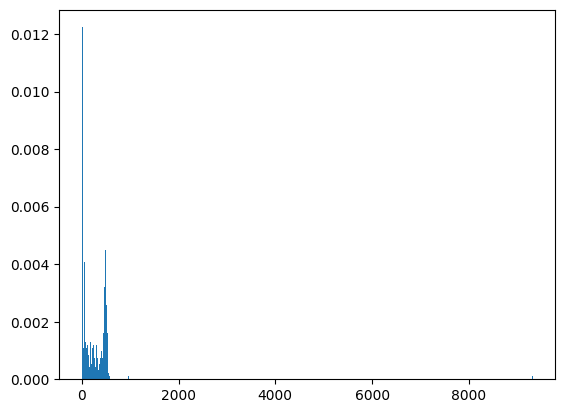

In [ ]:
plt.hist(hist, density=1, bins=_bins)
plt.show()

In [ ]:
#Another way to calculate it
def calculate_entropy(image):
    # Calculate histogram
    #For 16-bit images (pixel values ranging from 0 to 65535), you can consider using 512 bins
    hist = np.histogram(image, bins=512, range=(0, 512))[0]
    hist = hist / hist.sum()  # Normalize histogram to get probabilities

    # Calculate entropy
    entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))
    return entropy

In [ ]:
"""
For common 8-bit images (256 bins), the entropy values typically range from 0 to 8 bits.
For 16-bit images (65536 bins), the range would be from 0 to 16 bits.
"""
calculate_entropy(grayscale_image)

8.164178206149453

### Visualize image

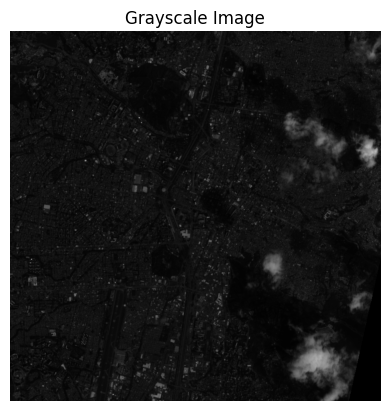

In [ ]:
import matplotlib.pyplot as plt

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Turn off axis labels and ticks (optional)
plt.show()

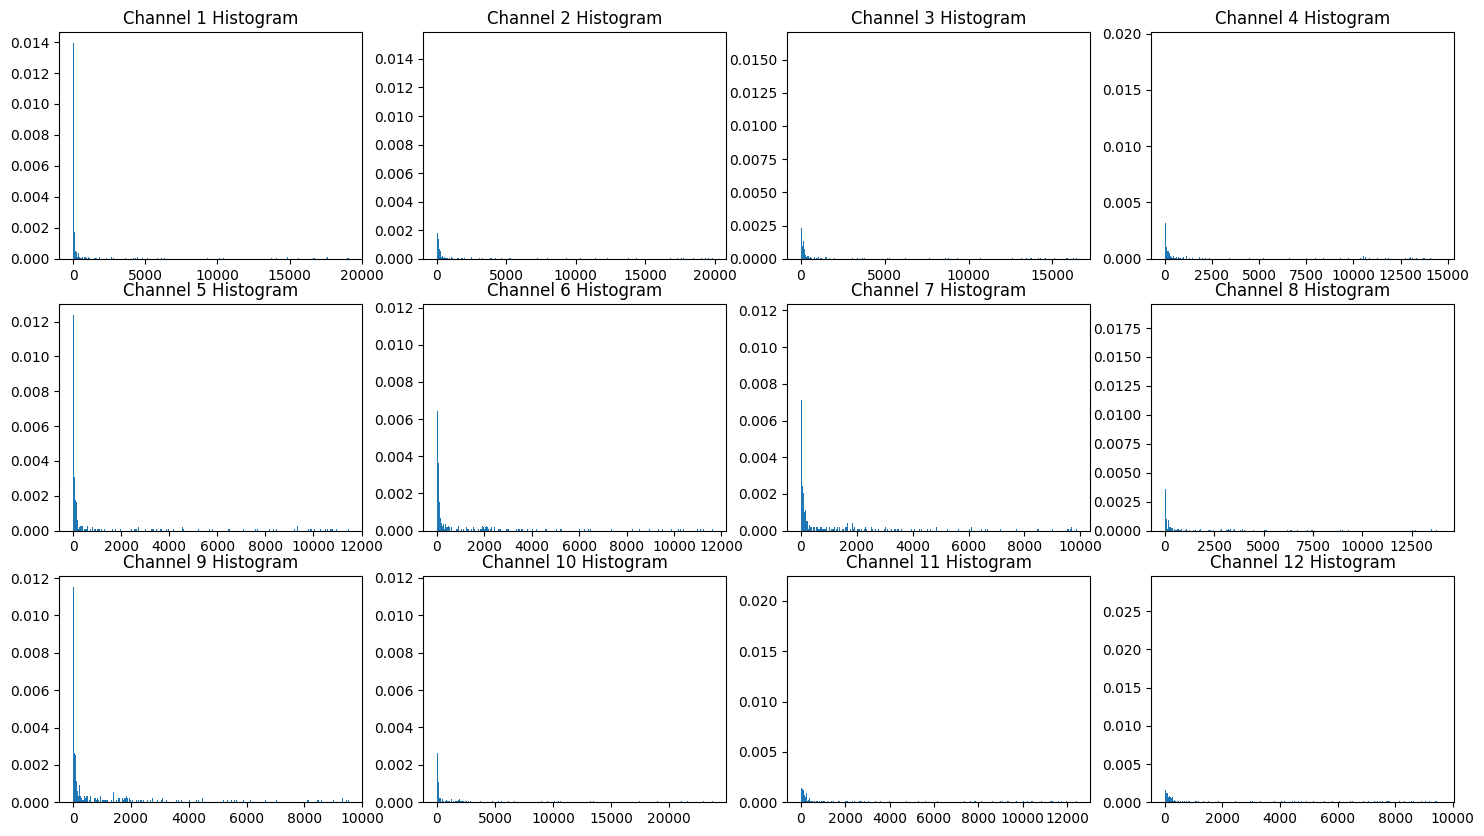

In [ ]:
channel_histograms = [np.histogram(img_result[:, :, i], bins=_bins) for i in range(12)]
plt.figure(figsize=(18, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.hist(channel_histograms[i][0], density=1, bins=_bins)
    #plt.hist()
    plt.title(f'Channel {i+1} Histogram')
plt.show()

In [ ]:
#shutil.rmtree("DATASET")
shutil.rmtree("data")

# Calculating entropy of images downloaded

In [ ]:
#!pip install tifffile
from tifffile import imread

In [ ]:
folder_path = '/content/drive/My Drive/satellite_project/satellite.extractor/DATASET/5001'
os.chdir(folder_path)

In [ ]:
tiff_files = glob.glob(os.path.join(folder_path, '*.tiff'))  # Change the file extension as needed
print(f"Number of images:{len(tiff_files)}")

Number of images:101


In [ ]:
entropy_values = []

for tiff_path in tiff_files:
  #print(tiff_path)
  filename = os.path.basename(tiff_path)
  #print(filename)

  # Read the TIFF image using tifffile.imread
  tiff_image = imread(tiff_path)
  gray_image = cv2.cvtColor(tiff_image[:, :, 1:4], cv2.COLOR_BGR2GRAY)
  # # Calculate entropy
  entropy = calculate_entropy(gray_image)
  entropy_values.append((filename, entropy))

<ipython-input-75-6dadcd20e320>:6: RuntimeWarning: invalid value encountered in divide
  hist = hist / hist.sum()  # Normalize histogram to get probabilities


In [ ]:
df = pd.DataFrame(entropy_values, columns=['Image File', 'Entropy'])
df.head(10)

,Image File,Entropy
0,image_2017-01-15.tiff,7.778166e+00
1,image_2017-03-05.tiff,-3.203427e-16
2,image_2017-04-16.tiff,2.960994e+00
3,image_2017-04-09.tiff,2.960994e+00
4,image_2017-01-11.tiff,7.652002e+00
5,image_2017-03-02.tiff,5.836126e+00
6,image_2017-03-15.tiff,7.796561e+00
7,image_2017-05-04.tiff,8.811614e+00
8,image_2017-06-10.tiff,8.209772e+00
9,image_2017-08-02.tiff,8.167853e+00


In [ ]:
df.describe()

,Entropy
count,9.300000e+01
mean,5.466905e+00
std,3.246212e+00
min,-3.203427e-16
25%,3.169925e+00
50%,7.098865e+00
75%,7.796561e+00
max,8.811614e+00


# Transfer to GCP bucket

In [ ]:
from google.colab import auth
auth.authenticate_user()

project_id = 'mit-hst-dengue'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://colombia_sebasmos/
gs://dsrestrepo/
gs://mit-hst-dengue/


In [ ]:
bucket_name = 'colombia_sebasmos'

!gsutil -m cp -r /content/drive/MyDrive/Dengue_prediction/Codes_download_data_sentinel/satellite.extractor/DATASET_5_best_cities/ gs://{bucket_name}/

In [ ]:
def plot_image(image, factor=1.0, clip_range = None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])


In [ ]:
images

['./DATASET/Ibagué/image_2015-11-01.tiff',
 './DATASET/Ibagué/image_2015-11-08.tiff',
 './DATASET/Ibagué/image_2015-11-15.tiff',
 './DATASET/Ibagué/image_2015-11-22.tiff',
 './DATASET/Ibagué/image_2015-11-29.tiff',
 './DATASET/Ibagué/image_2015-12-06.tiff',
 './DATASET/Ibagué/image_2015-12-13.tiff',
 './DATASET/Ibagué/image_2015-12-20.tiff',
 './DATASET/Ibagué/image_2015-12-27.tiff',
 './DATASET/Ibagué/image_2016-01-03.tiff',
 './DATASET/Ibagué/image_2016-01-10.tiff',
 './DATASET/Ibagué/image_2016-01-17.tiff',
 './DATASET/Ibagué/image_2016-01-24.tiff',
 './DATASET/Ibagué/image_2016-01-31.tiff',
 './DATASET/Ibagué/image_2016-02-07.tiff',
 './DATASET/Ibagué/image_2016-02-14.tiff',
 './DATASET/Ibagué/image_2016-02-21.tiff',
 './DATASET/Ibagué/image_2016-02-28.tiff',
 './DATASET/Ibagué/image_2016-03-06.tiff',
 './DATASET/Ibagué/image_2016-03-13.tiff',
 './DATASET/Ibagué/image_2016-03-20.tiff',
 './DATASET/Ibagué/image_2016-03-27.tiff',
 './DATASET/Ibagué/image_2016-04-03.tiff',
 './DATASET

In [ ]:
from skimage import io
import numpy as np
import cv2

ncols = 4
nrows = 3

aspect_ratio = 1#coordinates_size[0] / coordinates_size[1]
subplot_kw = {'xticks': [], 'yticks': [], 'frame_on': False}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols * aspect_ratio, 5 * nrows),
                            subplot_kw=subplot_kw)

for idx, path in enumerate(images):
        ax = axs[idx // ncols][idx % ncols]
        image = io.imread(path)
        image = np.array(image)
        image = image[:,:,1:4]
        ax.imshow(np.clip(image * 2.5/255, 0, 1))

plt.tight_layout()



# Move to structured folder in DATASETS
root_images_store = "." + root_images
dataset_store = "./" + city_str
for root, dirs, files in os.walk(root_images_store, topdown=True):
        for name in files:
          path = os.path.join(root, name)
          #print(path)
          if img_format in path and not dataset_store in path:
              shutil.copy(path, dataset_store)

images = glob.glob(dataset_store+"/*")